## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Checking Indiviudal CSV's
# mouse_metadata

In [3]:
# Checking Indiviudal CSV's
# study_results

In [4]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how = 'outer', on ='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Count Length Of Data Set 
# mouse_study_df.count()
mouse_study_df['Mouse ID'].count()

1893

In [6]:
# Checking unique number of mice 
# Checking the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [7]:
duplicate_mouse_ids = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
duplicate_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
main_mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
main_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
len(main_mouse_study_df['Mouse ID'].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
generate_summary = main_mouse_study_df[['Drug Regimen','Tumor Volume (mm3)']]

In [12]:
len(generate_summary['Drug Regimen'].unique())

10

In [13]:
groupby_regimen = generate_summary.groupby(['Drug Regimen'])
# groupby_regimen.head()

In [14]:
mean_summary = groupby_regimen['Tumor Volume (mm3)'].mean()
median_summary = groupby_regimen['Tumor Volume (mm3)'].median()
variance_summary = groupby_regimen['Tumor Volume (mm3)'].var()
std_summary = groupby_regimen['Tumor Volume (mm3)'].std()
sem_summary = groupby_regimen['Tumor Volume (mm3)'].sem()

In [15]:
summary_statistics_table = pd.DataFrame({"Mean":mean_summary,
                                          "Median":median_summary,
                                          "Variance":variance_summary,
                                          "Standard Deviation":std_summary,
                                          "SEM":sem_summary})
summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = groupby_regimen.agg([np.mean,np.median,np.var,np.std,sem])
aggregation_method 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
#total amount of tumor volume 

In [18]:
groupby_regimen['Tumor Volume (mm3)'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [19]:
drug_count_df = groupby_regimen['Tumor Volume (mm3)'].count()

In [20]:
#https://pythonexamples.org/convert-pandas-dataframe-to-numpy-array/#:~:text=To%20convert%20Pandas%20DataFrame%20to,returned%20ndarray%20is%202%2Ddimensional.
drug_list = drug_count_df.to_numpy()
drug_list

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

In [21]:
drug_names = ["Capomulin","Ceftamin","Infubinol","Ketapril","Nattisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

In [22]:
x_axis = np.arange(len(drug_list))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

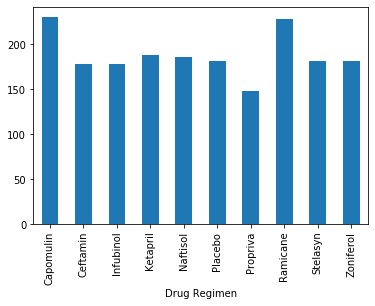

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count_df.plot.bar()

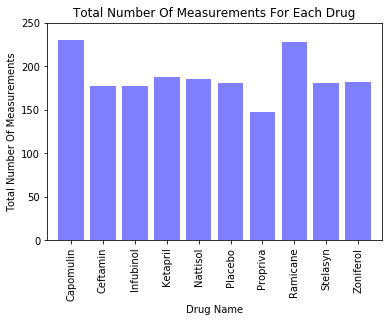

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x_axis, drug_list, width = 0.8, color = "b", alpha =0.5, align = "center")
tick_locations = [value for value in x_axis]

#https://matplotlib.org/stable/gallery/ticks_and_spines/ticklabels_rotation.html
plt.xticks(tick_locations, drug_names, rotation='vertical')


plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 250)

plt.title("Total Number Of Measurements For Each Drug")
plt.xlabel("Drug Name")
plt.ylabel("Total Number Of Measurements")

plt.show()

## Pie Plot

In [74]:
# Creating Data Frame With Sex Column
mouse_sex_df = main_mouse_study_df[['Sex']]
# mouse_sex_df 

In [26]:
mouse_sex_counts = mouse_sex_df['Sex'].value_counts()

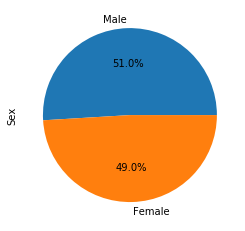

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_counts.plot.pie(autopct="%1.1f%%")

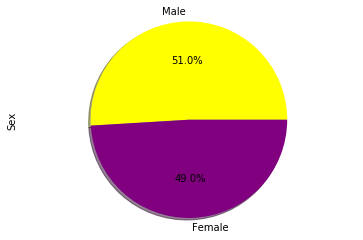

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male","Female"]

#https://pythonexamples.org/convert-pandas-dataframe-to-numpy-array/#:~:text=To%20convert%20Pandas%20DataFrame%20to,returned%20ndarray%20is%202%2Ddimensional.
# Total Counts For Each Sex In An Array
sex_list = mouse_sex_counts.to_numpy()

colors = ["yellow","purple"]

plt.pie(sex_list, labels=sex, autopct="%1.1f%%", colors=colors,shadow=True, startangle=0)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

finding_final_tumor_vol = main_mouse_study_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

# finding_final_tumor_vol

## Capomulin

In [30]:
# Locating Only Rows That Have Only Capomulin
only_capomulin = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Capomulin')]

In [31]:
# Join Selected Rows That Find Each Mouse's Final Timepoint 
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
max_capomulin_df = only_capomulin.groupby(['Mouse ID'])['Timepoint'].transform(max) == only_capomulin['Timepoint']
only_max_capomulin = only_capomulin[max_capomulin_df]

# only_max_capomulin

In [93]:
# Getting Final Tumor Volume From Each Mouse
max_capomulin_tumorvolume = only_max_capomulin[['Tumor Volume (mm3)']]

# Converting Final Tumor Volume From Each Mouse Into A Series (For Plotting)
max_capomulin_tumorvolume_series = max_capomulin_tumorvolume['Tumor Volume (mm3)']
# max_capomulin_tumorvolume_series

In [92]:
max_capomulin_tumorvolume_list = max_capomulin_tumorvolume_series.tolist()
max_capomulin_tumorvolume_list

[23.34359787,
 28.48403281,
 28.43096411,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 37.31184577,
 36.04104736,
 37.07402422,
 38.84687569,
 38.93963263,
 38.98287774,
 38.75326548,
 38.125164399999996,
 39.95234669,
 40.65812366,
 40.1592203,
 40.72857787,
 41.48300765,
 41.58152074,
 47.68596303,
 46.53920617]

In [102]:
capomulin_quartiles = max_capomulin_tumorvolume_series.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"Drug: Capomulin")
print(f"Lower Quartile: {capomulin_lowerq}")
print(f"Upper Quartile: {capomulin_upperq}")
print(f"IQR: {capomulin_iqr}")
print(f"Median: {capomulin_quartiles[0.5]}")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be potential outliers.")
print(f"Values above {capomulin_upper_bound} could be potential outliers.")


capomulin_upper_outliers = []
capomulin_lower_outliers = [] 

for i in range(0,len(max_capomulin_tumorvolume_list)):
    if max_capomulin_tumorvolume_list[i] < capomulin_lower_bound:
        capomulin_lower_outliers.append(max_capomulin_tumorvolume_list[i])

if capomulin_lower_outliers == True:
    print(f"Outliers are {capomulin_lower_outliers}")
else: 
    print("There are no outliers!")


Drug: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Median: 38.125164399999996
Values below 20.70456164999999 could be potential outliers.
Values above 51.83201549 could be potential outliers.
There are no outliers!


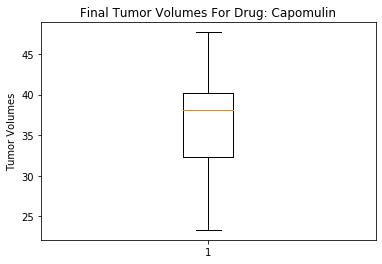

In [87]:
# Checking Box Plot For Capomulin
plt.boxplot(max_capomulin_tumorvolume_series)
plt.title("Final Tumor Volumes For Drug: Capomulin")
plt.ylabel('Tumor Volumes')
plt.show()

## Ramicane

In [35]:
# Locating Only Rows That Have Only Ramicane
only_ramicane = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Ramicane')]

In [36]:
# Join Selected Rows That Find Each Mouse's Final Timepoint 
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
max_ramicane_df = only_ramicane.groupby(['Mouse ID'])['Timepoint'].transform(max) == only_ramicane['Timepoint']
only_max_ramicane = only_ramicane[max_ramicane_df]

# only_max_ramicane

In [37]:
# Getting Final Tumor Volume From Each Mouse
max_ramicane_tumorvolume = only_max_ramicane[['Tumor Volume (mm3)']]

# Converting Final Tumor Volume From Each Mouse Into A Series (For Plotting)
max_ramicane_tumorvolume_series = max_ramicane_tumorvolume['Tumor Volume (mm3)']
# max_ramicane_tumorvolume_series

In [80]:
ramicane_quartiles = max_ramicane_tumorvolume_series.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"Drug: Ramicane")
print(f"Lower Quartile: {ramicane_lowerq}")
print(f"Upper Quartile: {ramicane_upperq}")
print(f"IQR: {ramicane_iqr}")
print(f"Median: {ramicane_quartiles[0.5]}")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be potential outliers.")
print(f"Values above {ramicane_upper_bound} could be potential outliers.")

Drug: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Median: 36.56165229
Values below 17.912664470000003 could be outliers in Ramicane.
Values above 54.30681135 could be outliers in Ramicane.


In [81]:
# Checking Box Plot For Ramicane
# plt.boxplot(max_ramicane_tumorvolume_series)
# plt.title("Final Tumor Volumes For Drug: Ramicane")
# plt.ylabel('Tumor Volumes')
# plt.show()

## Infubinol

In [40]:
# Locating Only Rows That Have Only Infubinol
only_infubinol = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Infubinol')]

In [41]:
# Join Selected Rows That Find Each Mouse's Final Timepoint 
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
max_infubinol_df = only_infubinol.groupby(['Mouse ID'])['Timepoint'].transform(max) == only_infubinol['Timepoint']
only_max_infubinol = only_infubinol[max_infubinol_df]

# only_max_infubinol

In [105]:
# Getting Final Tumor Volume From Each Mouse
max_infubinol_tumorvolume = only_max_infubinol[['Tumor Volume (mm3)']]

# Converting Final Tumor Volume From Each Mouse Into A Series (For Plotting)
max_infubinol_tumorvolume_series = max_infubinol_tumorvolume['Tumor Volume (mm3)']
# max_infubinol_tumorvolume_series

In [106]:
max_infubinol_tumorvolume_list = max_infubinol_tumorvolume_series.tolist()
# max_infubinol_tumorvolume_list

In [117]:
infubinol_quartiles = max_infubinol_tumorvolume_series.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"Drug: Infubinol")
print(f"Lower Quartile: {infubinol_lowerq}")
print(f"Upper Quartile: {infubinol_upperq}")
print(f"IQR: {infubinol_iqr}")
print(f"Median: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Lower Boundary: {infubinol_lower_bound}")
print(f"Upper Boundary: {infubinol_upper_bound}")

infubinol_upper_outliers = []
infubinol_lower_outliers = [] 
infubinol_count_upper_outliers = 0
infubinol_count_lower_outliers = 0

for i in range(0,len(max_infubinol_tumorvolume_list)):
    if max_infubinol_tumorvolume_list[i] > infubinol_upper_bound:
        infubinol_upper_outliers.append(max_infubinol_tumorvolume_list[i])
        infubinol_count_upper_outliers = infubinol_count_upper_outliers + 1

for i in range(0,len(max_infubinol_tumorvolume_list)):
    if max_infubinol_tumorvolume_list[i] < infubinol_lower_bound:
        infubinol_lower_outliers.append(max_infubinol_tumorvolume_list[i])
        infubinol_count_lower_outliers = infubinol_count_lower_outliers + 1

if infubinol_count_upper_outliers == 1:
    print(f"Outlier is {infubinol_upper_outliers}. Located above the upper bound.")
elif infubinol_count_upper_outliers > 1:
    print(f"Outliers are {infubinol_upper_outliers}. Located above the upper bound.")
else: 
    print("There are no outliers above the upper bound!")

if infubinol_count_lower_outliers == 1:
    print(f"Outlier is {infubinol_lower_outliers}. Located below the lower bound.")
elif infubinol_count_lower_outliers > 1:
    print(f"Outliers are {infubinol_lower_outliers}. Located below the lower bound.")
else: 
    print("There are no outliers below the lower bound!")

Drug: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Median: 60.16518046 
Lower Boundary: 36.83290494999999
Upper Boundary: 82.74144559000001
There are no outliers above the upper bound!
Outlier is [36.321345799999996]. Located below the lower bound.


In [113]:
# Checking Box Plot For Infubinol 
# plt.boxplot(max_infubinol_tumorvolume_series)
# plt.title("Final Tumor Volumes For Drug: Infubinol")
# plt.ylabel('Tumor Volumes')
# plt.show()

## Ceftamin 

In [45]:
# Locating Only Rows That Have Only Ceftamin
only_ceftamin = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Ceftamin')]

In [46]:
# Join Selected Rows That Find Each Mouse's Final Timepoint 
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
max_ceftamin_df = only_ceftamin.groupby(['Mouse ID'])['Timepoint'].transform(max) == only_ceftamin['Timepoint']
only_max_ceftamin = only_ceftamin[max_ceftamin_df]

# only_max_ceftamin

In [47]:
# Getting Final Tumor Volume From Each Mouse
max_ceftamin_tumorvolume = only_max_ceftamin[['Tumor Volume (mm3)']]

# Converting Final Tumor Volume From Each Mouse Into A Series (For Plotting)
max_ceftamin_tumorvolume_series = max_ceftamin_tumorvolume['Tumor Volume (mm3)']
# max_ceftamin_tumorvolume_series

In [118]:
max_ceftamin_tumorvolume_list = max_ceftamin_tumorvolume_series.tolist()
# max_ceftamin_tumorvolume_list

In [119]:
ceftamin_quartiles = max_ceftamin_tumorvolume_series.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print(f"Drug: Ceftamin")
print(f"Lower Quartile: {ceftamin_lowerq}")
print(f"Upper Quartile: {ceftamin_upperq}")
print(f"IQR: {ceftamin_iqr}")
print(f"Median: {ceftamin_quartiles[0.5]}")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Lower Boundary: {ceftamin_lower_bound}")
print(f"Upper Boundary: {ceftamin_upper_bound}")

ceftamin_upper_outliers = []
ceftamin_lower_outliers = [] 
ceftamin_count_upper_outliers = 0
ceftamin_count_lower_outliers = 0

for i in range(0,len(max_ceftamin_tumorvolume_list)):
    if max_ceftamin_tumorvolume_list[i] > ceftamin_upper_bound:
        ceftamin_upper_outliers.append(max_ceftamin_tumorvolume_list[i])
        ceftamin_count_upper_outliers = ceftamin_count_upper_outliers + 1

for i in range(0,len(max_ceftamin_tumorvolume_list)):
    if max_ceftamin_tumorvolume_list[i] < ceftamin_lower_bound:
        ceftamin_lower_outliers.append(max_ceftamin_tumorvolume_list[i])
        ceftamin_count_lower_outliers = ceftamin_count_lower_outliers + 1

if ceftamin_count_upper_outliers == 1:
    print(f"Outlier is {ceftamin_upper_outliers}. Located above the upper bound.")
elif infubinol_count_upper_outliers > 1:
    print(f"Outliers are {ceftamin_upper_outliers}. Located above the upper bound.")
else: 
    print("There are no outliers above the upper bound!")

if ceftamin_count_lower_outliers == 1:
    print(f"Outlier is {ceftamin_lower_outliers}. Located below the lower bound.")
elif ceftamin_count_lower_outliers > 1:
    print(f"Outliers are {ceftamin_lower_outliers}. Located below the lower bound.")
else: 
    print("There are no outliers below the lower bound!")

Drug: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Median: 59.85195552
Lower Boundary: 25.355449580000002
Upper Boundary: 87.66645829999999
There are no outliers above the upper bound!
There are no outliers below the lower bound!


In [75]:
# Checking Box Plot For Ceftamin 
# plt.boxplot(max_ceftamin_tumorvolume_series)
# plt.title("Final Tumor Volumes For Drug: Ceftamin")
# plt.ylabel('Tumor Volumes')
# plt.show()

## Box Plots

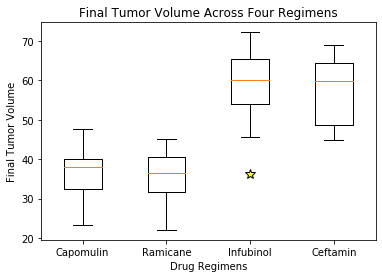

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_regimens_boxplot = [max_capomulin_tumorvolume_series, max_ramicane_tumorvolume_series,
                         max_infubinol_tumorvolume_series, max_ceftamin_tumorvolume_series]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Regimens')
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume')
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html
color_n_size = dict(markerfacecolor='yellow',markersize=10)
ax1.boxplot(four_regimens_boxplot, sym='*',flierprops=color_n_size)
# https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show()


## Line and Scatter Plots

In [52]:
only_capomulin['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_mouse_treated_capomulin = only_capomulin.loc[(only_capomulin['Mouse ID']== 'x401')]
# one_mouse_treated_capomulin

In [54]:
one_mouse_timepoint_list = one_mouse_treated_capomulin['Timepoint'].to_numpy()
# one_mouse_timepoint_list

In [55]:
one_mouse_tumorvolume_list = one_mouse_treated_capomulin['Tumor Volume (mm3)'].to_numpy()
# one_mouse_tumorvolume_list

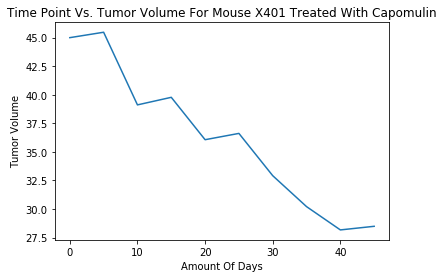

In [71]:
plt.plot(one_mouse_timepoint_list,one_mouse_tumorvolume_list)
plt.title('Time Point Vs. Tumor Volume For Mouse X401 Treated With Capomulin')
plt.xlabel('Amount Of Days')
plt.ylabel('Tumor Volume')
plt.show()

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
add_weight_df = main_mouse_study_df[['Mouse ID','Tumor Volume (mm3)', 'Weight (g)','Drug Regimen']]
add_weight_df 

,Mouse ID,Tumor Volume (mm3),Weight (g),Drug Regimen
0,k403,45.000000,16,Ramicane
1,k403,38.825898,16,Ramicane
2,k403,35.014271,16,Ramicane
3,k403,34.223992,16,Ramicane
4,k403,32.997729,16,Ramicane
...,...,...,...,...
1888,z969,63.145652,30,Naftisol
1889,z969,65.841013,30,Naftisol
1890,z969,69.176246,30,Naftisol
1891,z969,70.314904,30,Naftisol


In [58]:
only_capmulin_with_weight = add_weight_df.loc[(add_weight_df ['Drug Regimen']== 'Capomulin')]
only_capmulin_with_weight

,Mouse ID,Tumor Volume (mm3),Weight (g),Drug Regimen
10,s185,45.000000,17,Capomulin
11,s185,43.878496,17,Capomulin
12,s185,37.614948,17,Capomulin
13,s185,38.177232,17,Capomulin
14,s185,36.866876,17,Capomulin
...,...,...,...,...
440,i557,47.685963,24,Capomulin
1452,r157,45.000000,25,Capomulin
1453,r157,45.597064,25,Capomulin
1454,r157,46.059608,25,Capomulin


In [59]:
groupby_mouse_id = only_capmulin_with_weight.groupby('Mouse ID')
groupby_mouse_id.head()

,Mouse ID,Tumor Volume (mm3),Weight (g),Drug Regimen
10,s185,45.000000,17,Capomulin
11,s185,43.878496,17,Capomulin
12,s185,37.614948,17,Capomulin
13,s185,38.177232,17,Capomulin
14,s185,36.866876,17,Capomulin
...,...,...,...,...
435,i557,43.967895,24,Capomulin
1452,r157,45.000000,25,Capomulin
1453,r157,45.597064,25,Capomulin
1454,r157,46.059608,25,Capomulin


In [60]:
average_tumor_volumes = groupby_mouse_id["Tumor Volume (mm3)"].mean()
find_individual_weight = groupby_mouse_id["Weight (g)"].mean()

In [61]:
average_tumor_volume_n_weight_table = pd.DataFrame({"Average Tumor Volumes":average_tumor_volumes,
                                           "Individual Weight":find_individual_weight })
# average_tumor_volume_n_weight_table

In [62]:
average_tumor_volume_list = average_tumor_volume_n_weight_table['Average Tumor Volumes'].to_numpy()
average_tumor_volume_list

array([41.96363563, 40.0836993 , 36.50597276, 41.99009661, 44.6133439 ,
       44.80580968, 39.14105275, 44.46523635, 43.21692461, 44.43447379,
       42.50726104, 34.8474699 , 39.04981645, 45.79896951, 36.50921205,
       43.36736445, 34.55914339, 42.80373304, 39.3287251 , 39.88749519,
       41.5815951 , 41.38482521, 41.35245228, 36.18203956, 38.50682925])

In [63]:
individual_weight_list = average_tumor_volume_n_weight_table['Individual Weight'].to_numpy()
individual_weight_list

array([22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17,
       23, 17, 17, 21, 23, 21, 15, 17])

In [64]:
max_weight = average_tumor_volume_n_weight_table['Individual Weight'].max()
x_limit = max_weight + 1
x_limit

26

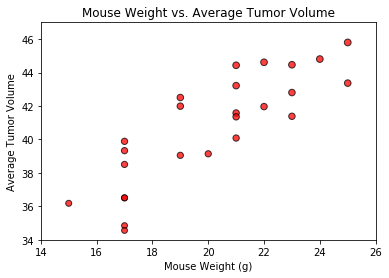

In [65]:
plt.scatter(individual_weight_list,average_tumor_volume_list, marker="o", facecolors="red", edgecolors="black",
            s=average_tumor_volume_list, alpha=0.75)
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.xlim(14, x_limit)
plt.ylim(34, 47)
plt.show()

In [66]:
#id_weight = only_capmulin_with_weight[['Mouse ID','Weight (g)']]
#id_weight

In [67]:
#indivual_mosue_weight = id_weight.groupby('Mouse ID')
#indivual_mosue_weight.head()

In [68]:
#average_tumor_value = only_tumor_volume_n_weight["Tumor Volume (mm3)"].mean()
#average_tumor_value

In [69]:
#average_tumor_value_df = only_tumor_volume_n_weight[['Mouse ID']]
#average_tumor_value_df = pd.DataFrame(average_tumor_value)
#df = average_tumor_value_df.rename(columns={"Mouse ID":"Mean"})
#df.head()

## Correlation and Regression

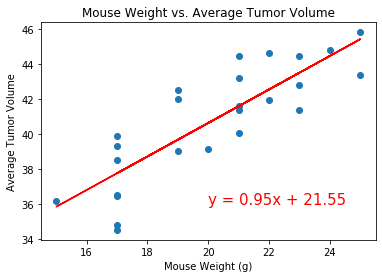

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = individual_weight_list
y_values = average_tumor_volume_list
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()